In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
print(df)
print(df.shape)

    Chirps  Ground Temperature
0     20.0                88.6
1     16.0                71.6
2     19.8                93.3
3     18.4                84.3
4     17.1                80.6
5     15.5                75.2
6     14.7                69.7
7     15.7                71.6
8     15.4                69.4
9     16.3                83.3
10    15.0                79.6
11    17.2                82.6
12    16.0                80.6
13    17.0                83.5
14    14.4                76.3
(15, 2)


In [4]:
df.describe()

,Chirps,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [5]:
# Checking for Outliers

In [6]:
iqr = df.Chirps.quantile(0.75) - df.Chirps.quantile(0.25)
upper_threshold = df.Chirps.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df.Chirps.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold,lower_threshold


(19.699999999999996, 12.9)

In [7]:
iqr1 = df['Ground Temperature'].quantile(0.75) - df['Ground Temperature'].quantile(0.25)
upper_threshold = df['Ground Temperature'].quantile(0.75) + (1.5 * iqr1) # q3 + 1.5iqr
lower_threshold = df['Ground Temperature'].quantile(0.25) - (1.5 * iqr1) # q1 - 1.5iqr
upper_threshold,lower_threshold

(98.4, 58.400000000000006)

In [8]:
# Cleaning the data

In [9]:
df.isnull().sum()

Chirps                0
Ground Temperature    0
dtype: int64

In [10]:
df = df.drop_duplicates() # code to delete duplicates
df.shape

(15, 2)

In [11]:
df.dtypes

Chirps                float64
Ground Temperature    float64
dtype: object

In [12]:
# EDA

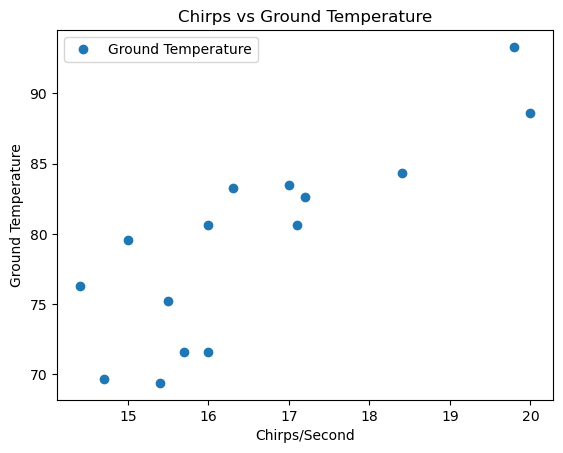

In [13]:
df.plot(x='Chirps', y='Ground Temperature', style='o')
plt.title('Chirps vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

In [14]:
df.corr()

,Chirps,Ground Temperature
Chirps,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [15]:
# Splitting the data

In [16]:
X = df.loc[:, ['Chirps']].values 
y = df.loc[:, 'Ground Temperature'].values 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# Scaling

In [18]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Modelling the data

In [20]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 

regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
regressor.intercept_

79.775

In [22]:
regressor.coef_

array([5.72361958])

In [23]:
y_pred = regressor.predict(X_test) 
y_pred

array([73.16540669, 77.42613626, 81.35911741])

In [24]:
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset

,Actual,Predicted
0,69.7,73.165407
1,80.6,77.426136
2,82.6,81.359117


In [25]:
# Metrics

In [26]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7549729187405705


5.72361957845539 79.775


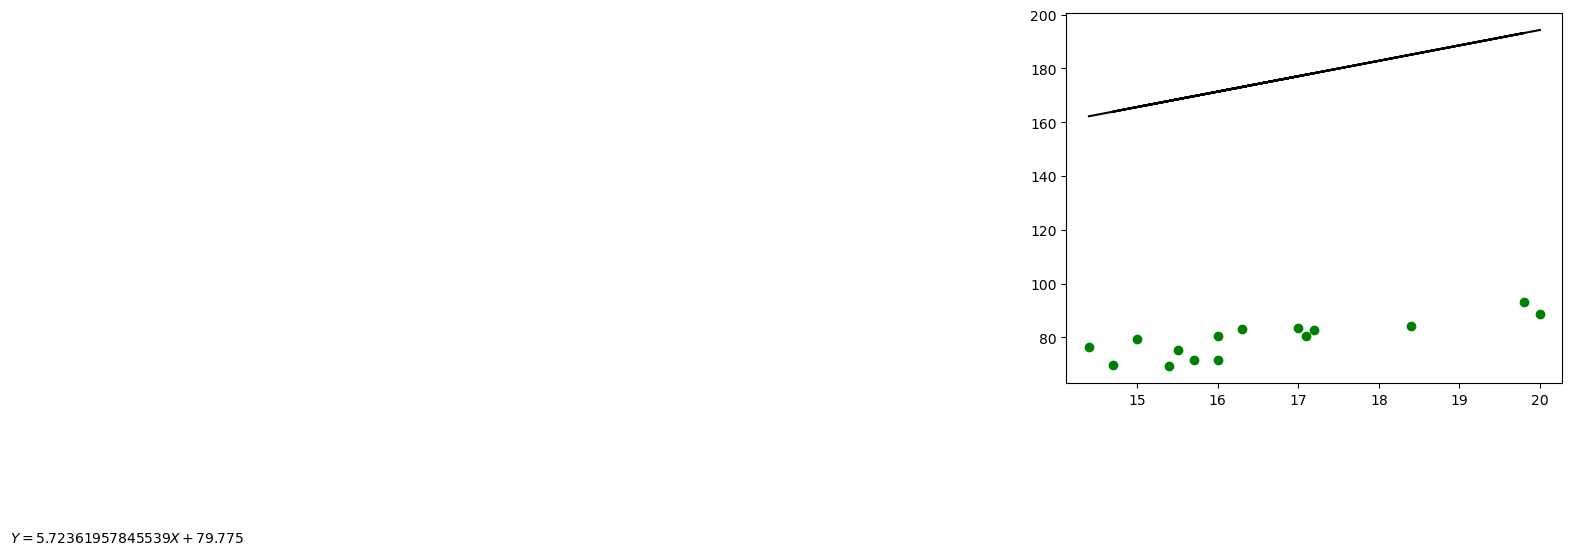

In [27]:
fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(X, y, color='g')
plt.plot(X, regressor.predict(X),color='k')
ax.text(1, 4, f'$Y = {regressor.coef_[0]}X + {regressor.intercept_}$', fontsize=10)


print(regressor.coef_[0], regressor.intercept_)

In [28]:
#Extrapolate data
regressor.predict([[18]])

array([182.80015241])

In [29]:
#Interpolate data
regressor.predict([[95]])

array([623.51885995])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [30]:
data = pd.read_fwf("brain_body.txt")

In [31]:
data

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [32]:
data.shape

(62, 2)

In [33]:
data.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [34]:
# Checking for Outliers

In [35]:
iqr = data.Brain.quantile(0.75) - data.Brain.quantile(0.25)
upper_threshold = data.Brain.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = data.Brain.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold,lower_threshold

(119.60625, -70.80375000000001)

In [36]:
iqr1 = data.Body.quantile(0.75) - data.Body.quantile(0.25)
upper_threshold = data.Body.quantile(0.75) + (1.5 * iqr1) # q3 + 1.5iqr
lower_threshold = data.Body.quantile(0.25) - (1.5 * iqr1) # q1 - 1.5iqr
upper_threshold,lower_threshold

(408.625, -238.375)

In [37]:
# Clipping the outliers

In [38]:
data.Brain = data.Brain.clip(-70, 119)

In [39]:
data.Body = data.Body.clip(-238, 408)

In [40]:
data.isnull().sum()

Brain    0
Body     0
dtype: int64

In [41]:
data.dtypes

Brain    float64
Body     float64
dtype: object

In [42]:
data = data.drop_duplicates()

In [43]:
data.shape

(56, 2)

In [44]:
#EDA

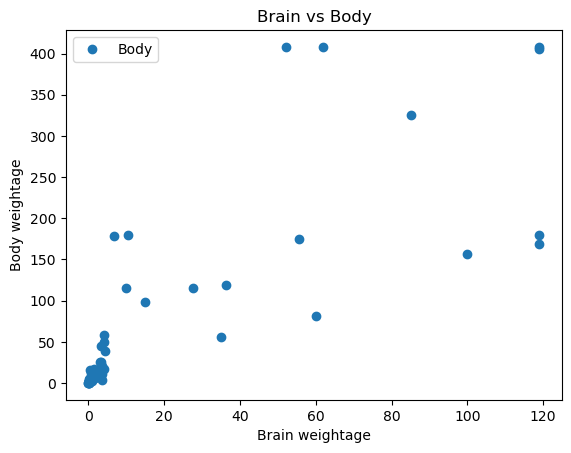

In [45]:
data.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain weightage')
plt.ylabel('Body weightage')
plt.show()

In [46]:
data.corr()

,Brain,Body
Brain,1.000000,0.799397
Body,0.799397,1.000000


In [47]:
# Spiltting the data

In [48]:
X = data.loc[:, ['Brain']].values 
y = data.loc[:, 'Body'].values 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
# Scaling the data

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [51]:
# Modelling the data

In [52]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [53]:
regressor.intercept_

80.33613636363636

In [54]:
regressor.coef_

array([102.52701424])

In [55]:
y_pred = regressor.predict(X_test) 
y_pred

array([ 22.93965026,  20.15071483,  28.9465881 ,  22.79662793,
        31.04901634, 359.32816937,  19.07232647,  28.61763674,
        38.38606185,  20.50827066,  29.23263276,  19.22393014])

In [56]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,12.50,22.939650
1,6.40,20.150715
2,3.90,28.946588
3,8.10,22.796628
4,50.40,31.049016
5,169.00,359.328169
6,0.33,19.072326
7,44.50,28.617637
8,179.00,38.386062
9,2.40,20.508271


In [57]:
# Metrics

In [58]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -0.30826141811979313


102.52701424184565 80.33613636363636


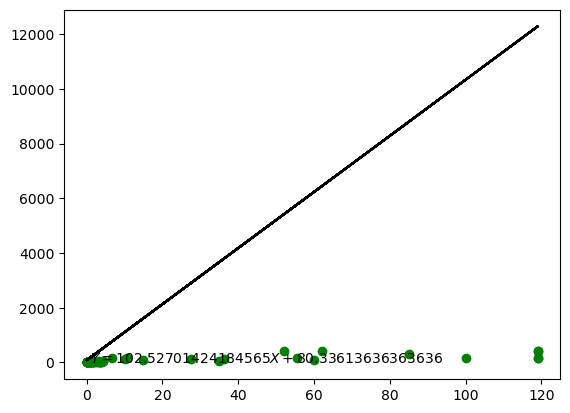

In [59]:
fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(X, y, color='g')
plt.plot(X, regressor.predict(X),color='k')
ax.text(1, 4, f'$Y = {regressor.coef_[0]}X + {regressor.intercept_}$', fontsize=10)


print(regressor.coef_[0], regressor.intercept_)

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [60]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [61]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [62]:
df.shape

(52, 6)

In [63]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [64]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [65]:
df = df.drop_duplicates()

In [66]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [67]:
# checking for outliers

In [68]:
iqr = df['Sex'].quantile(0.75) - df['Sex'].quantile(0.25)
upper_threshold = df['Sex'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Sex'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(2.5, -1.5)

In [69]:
iqr1 = df['Rank'].quantile(0.75) - df['Rank'].quantile(0.25)
upper_threshold = df['Rank'].quantile(0.75) + (1.5 * iqr1)
lower_threshold = df['Rank'].quantile(0.25) - (1.5 * iqr1)
upper_threshold, lower_threshold

(6.0, -2.0)

In [70]:
iqr2 = df['Year'].quantile(0.75) - df['Year'].quantile(0.25)
upper_threshold = df['Year'].quantile(0.75) + (1.5 * iqr2)
lower_threshold = df['Year'].quantile(0.25) - (1.5 * iqr2)
upper_threshold, lower_threshold

(23.0, -9.0)

In [71]:
iqr3 = df['Degree'].quantile(0.75) - df['Degree'].quantile(0.25)
upper_threshold = df['Degree'].quantile(0.75) + (1.5 * iqr3)
lower_threshold = df['Degree'].quantile(0.25) - (1.5 * iqr3)
upper_threshold, lower_threshold

(2.5, -1.5)

In [72]:
iqr4 = df['YSdeg'].quantile(0.75) - df['YSdeg'].quantile(0.25)
upper_threshold = df['YSdeg'].quantile(0.75) + (1.5 * iqr4)
lower_threshold = df['YSdeg'].quantile(0.25) - (1.5 * iqr4)
upper_threshold, lower_threshold

(48.0, -18.0)

In [73]:
df.shape

(52, 6)

In [74]:
#EDA

In [75]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


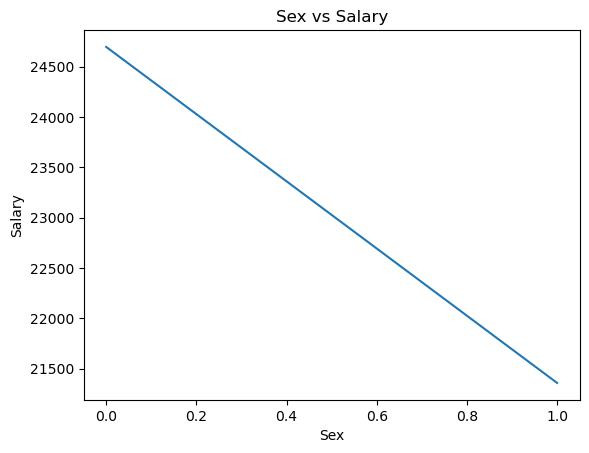

In [76]:
df.groupby('Sex')['Salary'].mean().plot()

#df.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [77]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


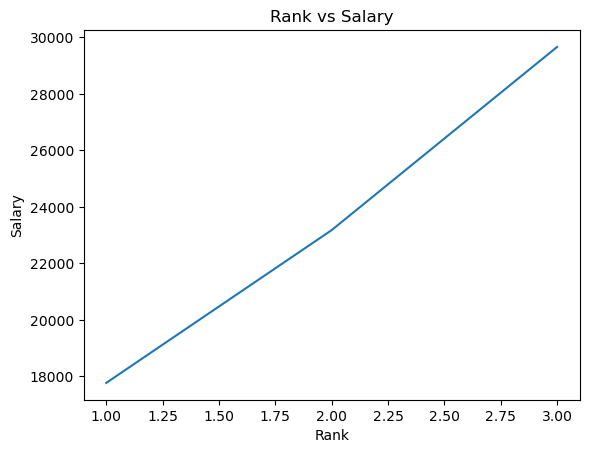

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [78]:
df.groupby('Rank')['Salary'].mean().plot()

#df.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

df[['Rank','Salary']].corr()

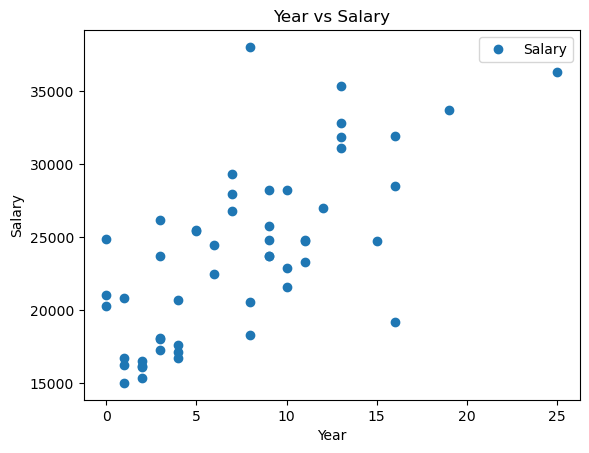

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [79]:
df.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

df[['Year','Salary']].corr()

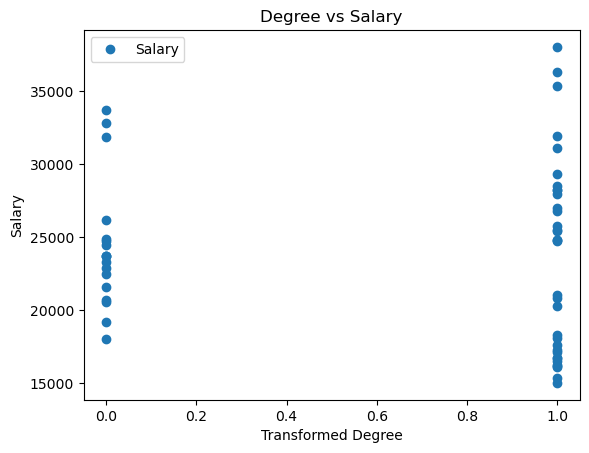

,transformed,Salary
transformed,1.000000,-0.069726
Salary,-0.069726,1.000000


In [80]:
df['transformed'] = (df['Degree']) # transformation
df.plot(x='transformed', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Transformed Degree')
plt.ylabel('Salary')
plt.show()
df[['transformed','Salary']].corr()

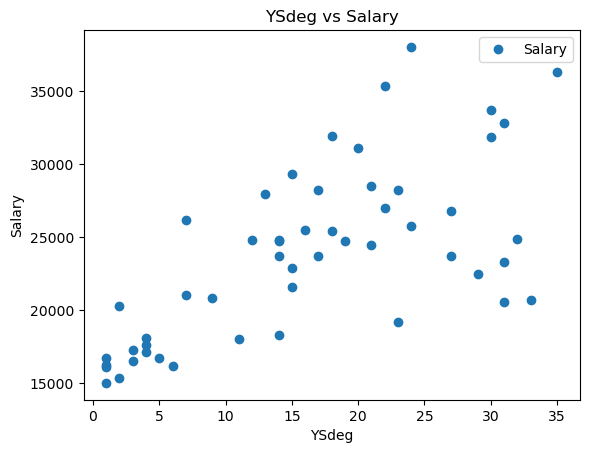

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [81]:
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

df[['YSdeg','Salary']].corr()

In [82]:
# Spiltting the data

In [83]:
X = df[['Sex', 'Rank', 'Year','YSdeg']].values 
y = df['Salary'].values 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
# Scaling

In [85]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [86]:
# Modelling the data

In [87]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [88]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year','YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,586.432353
Rank,4320.861522
Year,2226.138192
YSdeg,-507.766694


In [89]:
regressor.intercept_ 

23199.317073170732

In [90]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,27959,28019.783168
1,25500,28301.410041
2,36350,34966.645665
3,23725,20975.600651
4,25748,28367.271911
5,20300,16644.010027
6,20850,20479.301629
7,15000,17140.176668
8,35350,30252.731624
9,29342,27920.576316


In [91]:
# Metrics

In [92]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7659721966119593


In [93]:
# Sex is also one of the factor for salary